In [110]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')

**Data Reading and Renaming Columns**

In [111]:
df_train = pd.read_csv("D:\\Ml project\\train.csv")
train_length = len(df_train)
df_test = pd.read_csv("D:\\Ml project\\test.csv")
df_train.rename(columns = {'Personality (Class label)':'Personality'}, inplace = True) 
df_test.rename(columns = {'Personality (class label)':'Personality'}, inplace = True) 
df = pd.concat([df_train, df_test])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


**Distribution of each trait within each of the personality label categories**

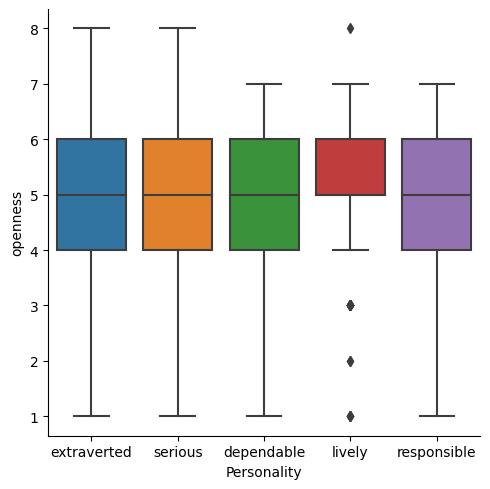

In [112]:
sns.catplot(x="Personality", y="openness", kind="box", data=df)

Each personality label has very similar distributions of 'openness', besides 'lively' which has a distribution which seems a bit more concentrated at above average values.

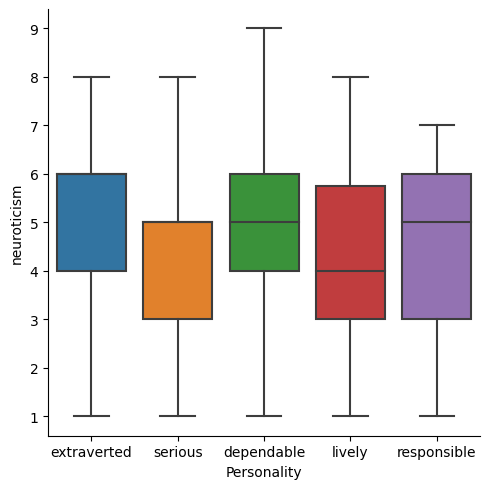

In [113]:
sns.catplot(x="Personality", y="neuroticism", kind="box", data=df)

'neuroticism'has somewhat different distributions within each personality label.

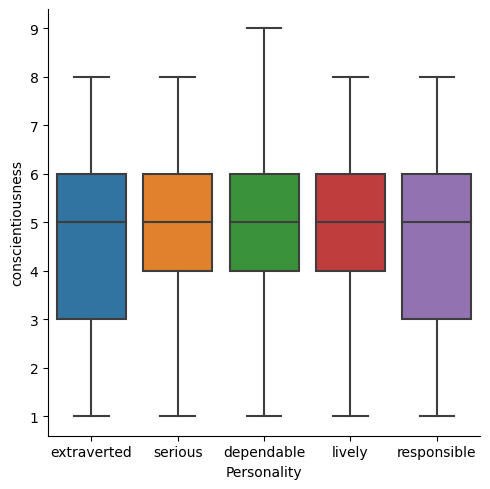

In [114]:
sns.catplot(x="Personality", y="conscientiousness", kind="box", data=df)

'conscientiousness' is distributed quite similarly within each personality label, although the 'extraverted' and 'responsible' labels have more individuals with a below average rating.

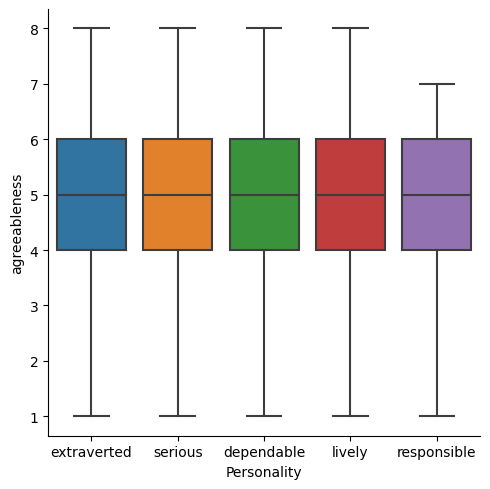

In [115]:
sns.catplot(x="Personality", y="agreeableness", kind="box", data=df)

'agreeableness' has basically identical distributions for each personality label

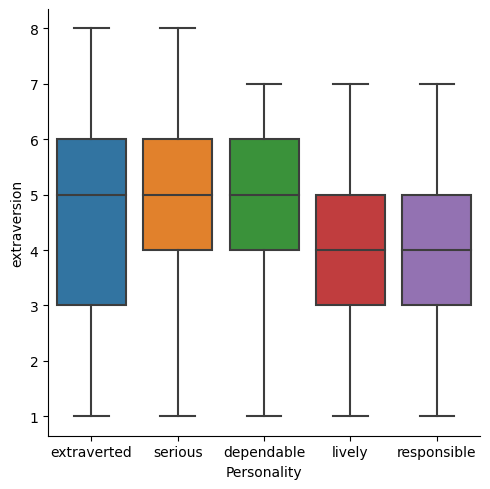

In [116]:
sns.catplot(x="Personality", y="extraversion", kind="box", data=df)

We can see that 'extraversion' has only somewhat different distributions across the personality labels, and a rough divide can be seen between some of the labels. 

**Data Cleaning**

In [117]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Personality'] = df['Personality'].map({'dependable': 0, 'extraverted': 1, 'lively': 2, 'responsible': 3, 'serious': 4})
df[df.isnull().sum(axis=1) > 0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
449,NaN,21,2,5,6,1,5,4


In [118]:
df['Personality'].fillna('unknown', inplace=True)
grouped_df = df.groupby(by=['Personality', 'Age']).mean().loc[4]
df.at[449,'Gender']=0

In [119]:
df.isnull()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
310,False,False,False,False,False,False,False,False
311,False,False,False,False,False,False,False,False
312,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False


**Data Exploration**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 314
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1024 non-null   float64
 1   Age                1024 non-null   int64  
 2   openness           1024 non-null   int64  
 3   neuroticism        1024 non-null   int64  
 4   conscientiousness  1024 non-null   int64  
 5   agreeableness      1024 non-null   int64  
 6   extraversion       1024 non-null   int64  
 7   Personality        1024 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 104.3 KB


In [121]:
df.describe()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.523438,19.857422,4.967773,4.627930,4.695312,4.833008,4.568359,2.243164
std,0.499694,2.555577,1.525904,1.708824,1.730339,1.658664,1.554866,1.474598
min,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,18.000000,4.000000,4.000000,3.000000,4.000000,4.000000,1.000000
50%,1.000000,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000
75%,1.000000,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000
max,1.000000,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000,4.000000


**Data Visualization**

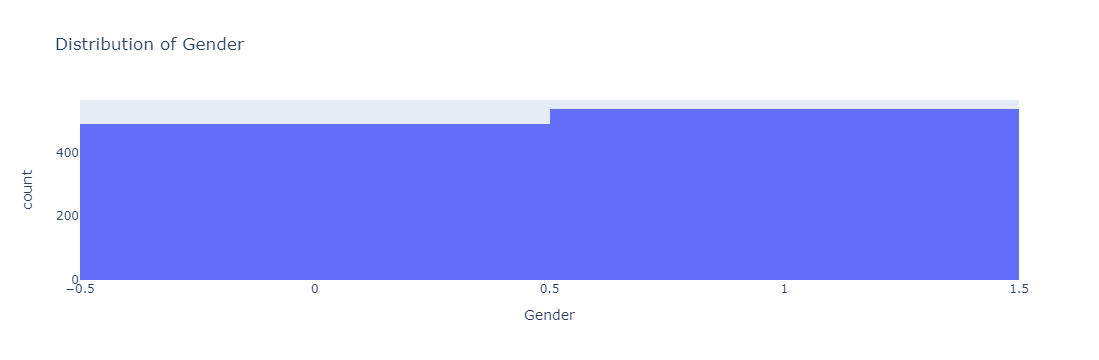

In [122]:
fig_gender = px.histogram(df, x='Gender', title='Distribution of Gender')
fig_gender.show()

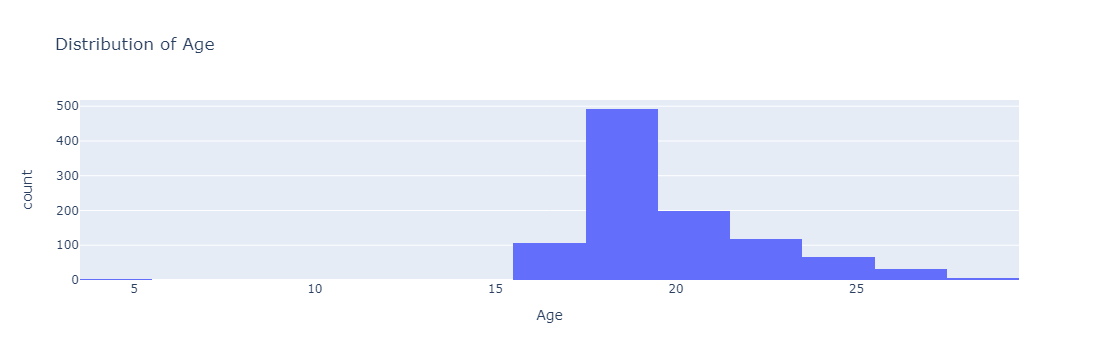

In [123]:
fig_age = px.histogram(df, x='Age', nbins=20, title='Distribution of Age')
fig_age.show()

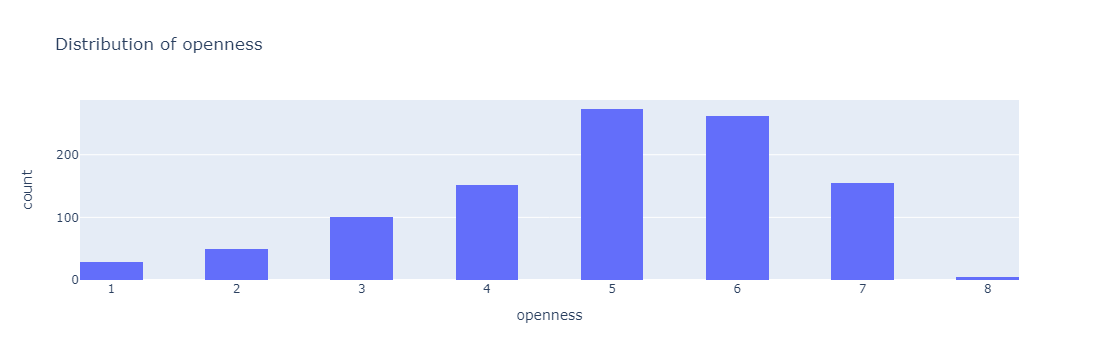

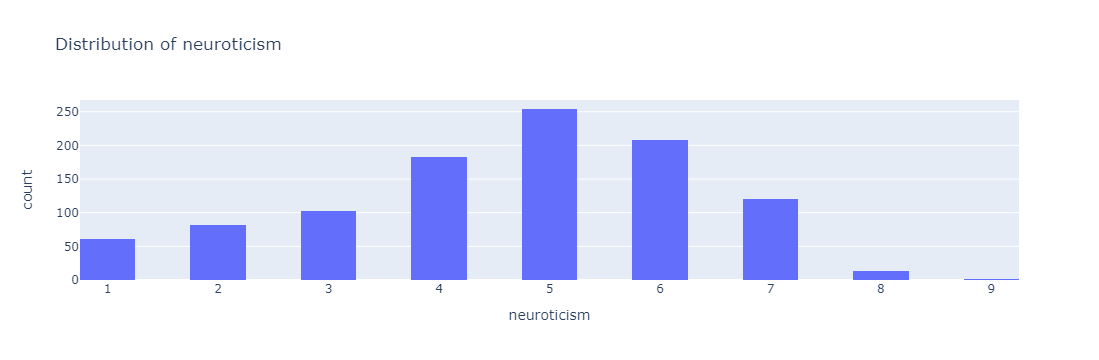

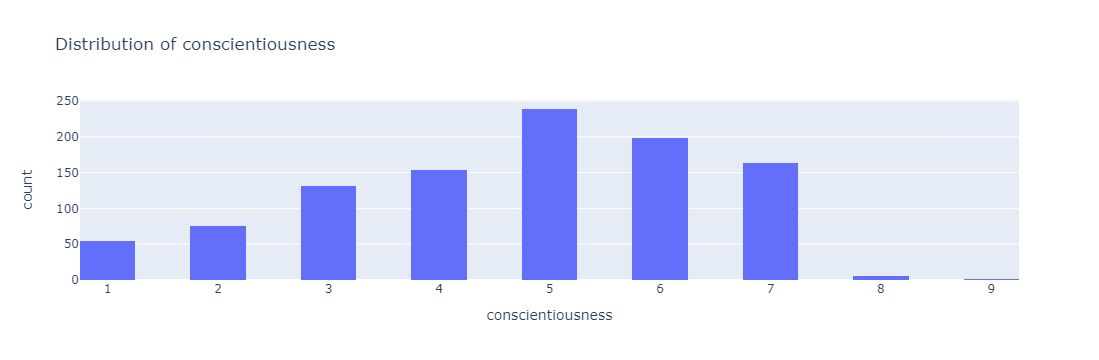

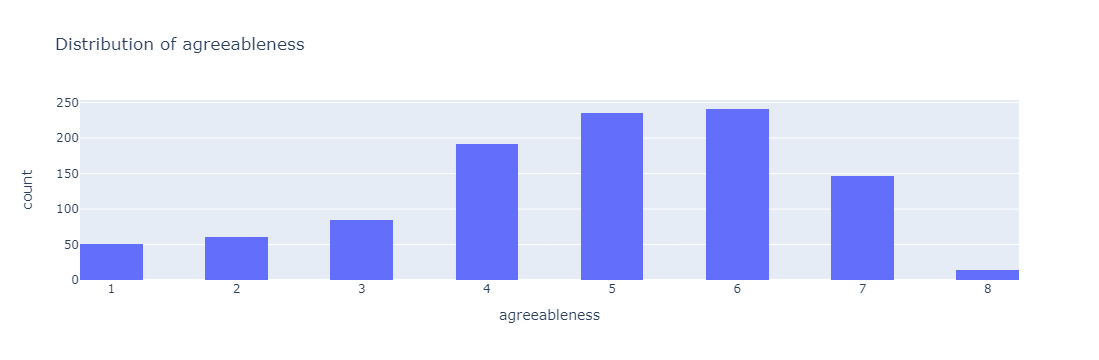

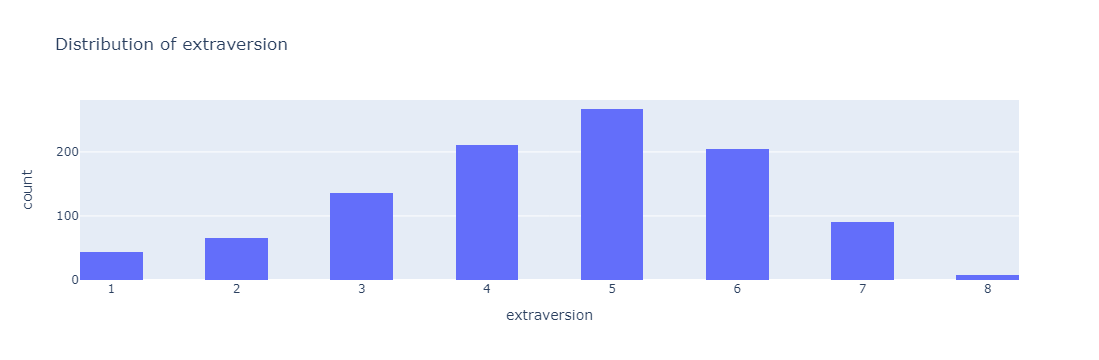

In [124]:
personality_traits = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']

for trait in personality_traits:
    fig_trait = px.histogram(df, x=trait, nbins=20, title=f'Distribution of {trait}')
    fig_trait.show()

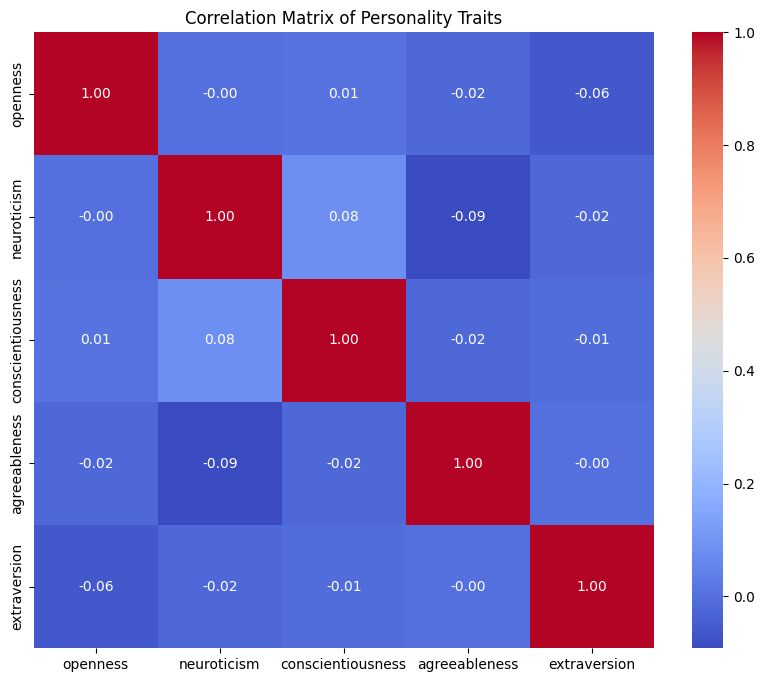

In [125]:
correlation_matrix = df[personality_traits].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Personality Traits')
plt.show()

In [126]:
def detect_outliers(data, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.extend(outliers)
        
    return list(set(outlier_indices))

numerical_features = ['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']

outliers_iqr = detect_outliers(df, numerical_features)
print("Number of outliers detected using IQR method:", len(outliers_iqr))

Number of outliers detected using IQR method: 41


In [127]:
df_cleaned_iqr = df.drop(outliers_iqr, axis=0).reset_index(drop=True)

print("Shape of the cleaned dataset:", df_cleaned_iqr.shape)

Shape of the cleaned dataset: (963, 8)


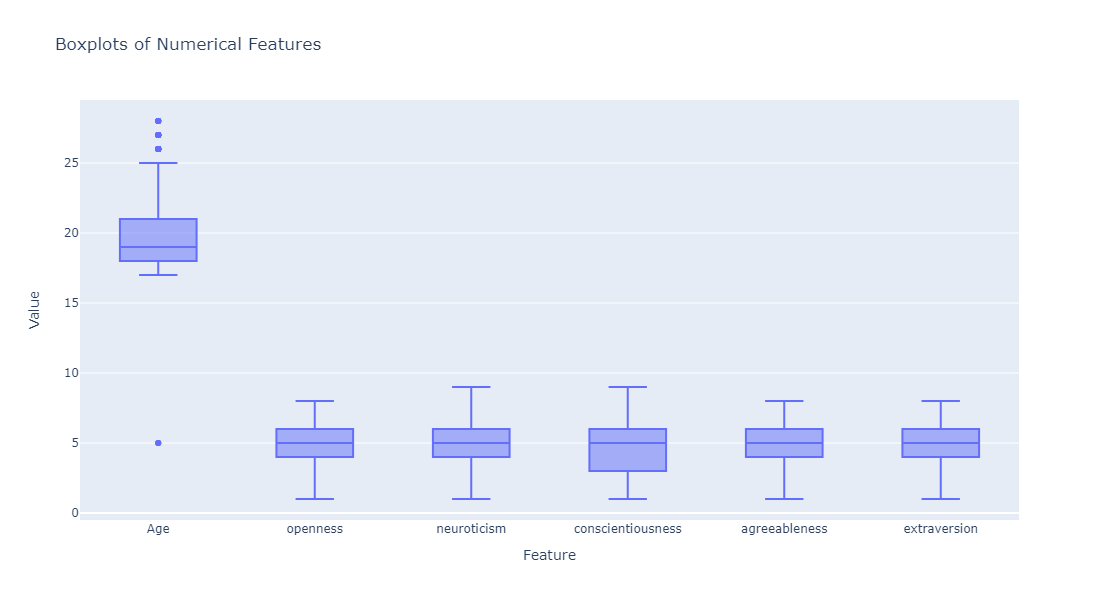

In [128]:
fig = px.box(df, y=numerical_features, title='Boxplots of Numerical Features', labels={'variable': 'Feature', 'value': 'Value'})
fig.update_layout(width=1000, height=600)
fig.show()

In [129]:
X = df[['Age']]
y = df['openness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.397882210229068


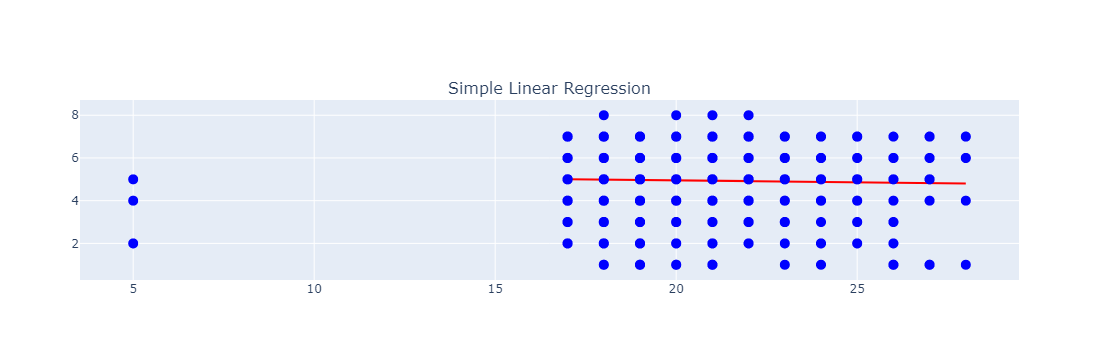

In [130]:
regression_df = pd.DataFrame({'Age': X_test['Age'], 'Openness': y_pred})

scatter_fig = px.scatter(df, x='Age', y='openness', title='Simple Linear Regression', labels={'openness': 'Actual Values'})
scatter_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')

line_fig = px.line(regression_df, x='Age', y='Openness', line_shape='linear', labels={'Openness': 'Regression Line'})
line_fig.update_traces(line=dict(color='red'), name='Regression Line')

combined_fig = make_subplots(rows=1, cols=1, subplot_titles=['Simple Linear Regression'])

combined_fig.add_trace(scatter_fig.data[0], row=1, col=1)

combined_fig.add_trace(line_fig.data[0], row=1, col=1)

combined_fig.update_layout(showlegend=True)

combined_fig.show()

In [131]:
X = df[['Age']]
y = df['neuroticism']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.5858878238766256


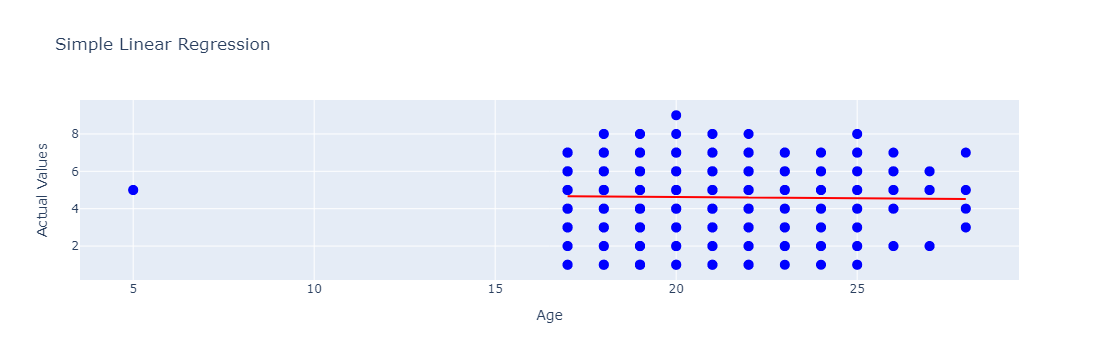

In [132]:
regression_df = pd.DataFrame({'Age': X_test['Age'], 'neuroticism': y_pred})

scatter_fig = px.scatter(df, x='Age', y='neuroticism', title='Simple Linear Regression', labels={'neuroticism': 'Actual Values'})
scatter_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')

line_fig = px.line(regression_df, x='Age', y='neuroticism', line_shape='linear', labels={'neuroticism': 'Regression Line'})
line_fig.update_traces(line=dict(color='red'), name='Regression Line')

combined_fig = px.scatter(df, x='Age', y='neuroticism', title='Simple Linear Regression', labels={'neuroticism': 'Actual Values'})
combined_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')
combined_fig.add_trace(line_fig.data[0]) 

combined_fig.show()

In [133]:
X = df[['Age']]
y = df['conscientiousness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.6661074925370203


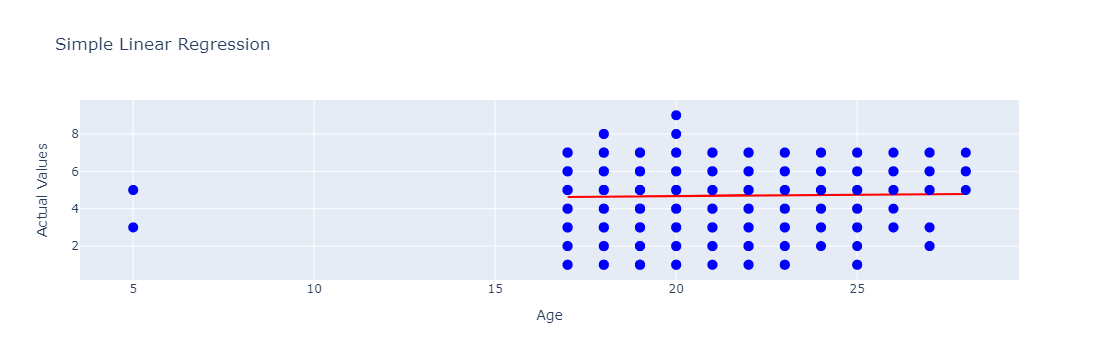

In [134]:
regression_df = pd.DataFrame({'Age': X_test['Age'], 'conscientiousness': y_pred})

scatter_fig = px.scatter(df, x='Age', y='conscientiousness', title='Simple Linear Regression', labels={'conscientiousness': 'Actual Values'})
scatter_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')

line_fig = px.line(regression_df, x='Age', y='conscientiousness', line_shape='linear', labels={'conscientiousness': 'Regression Line'})
line_fig.update_traces(line=dict(color='red'), name='Regression Line')

combined_fig = px.scatter(df, x='Age', y='conscientiousness', title='Simple Linear Regression', labels={'conscientiousness': 'Actual Values'})
combined_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')
combined_fig.add_trace(line_fig.data[0]) 

combined_fig.show()

In [135]:
X = df[['Age']]
y = df['agreeableness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.877771787228528


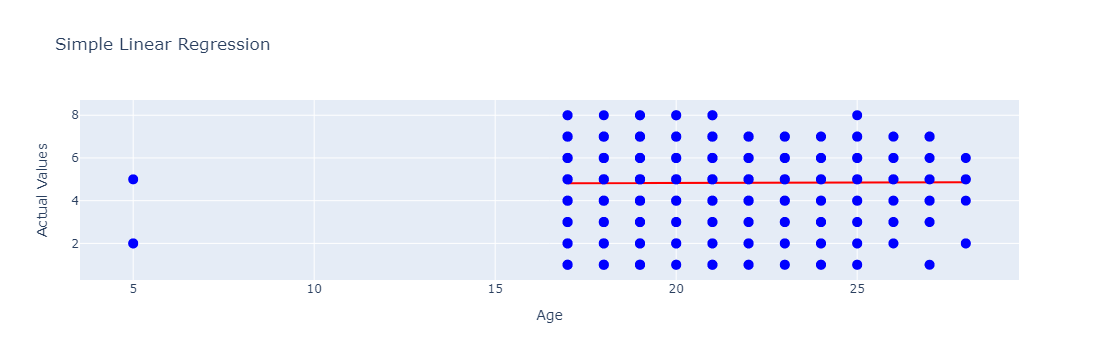

In [136]:
regression_df = pd.DataFrame({'Age': X_test['Age'], 'agreeableness': y_pred})

scatter_fig = px.scatter(df, x='Age', y='agreeableness', title='Simple Linear Regression', labels={'agreeableness': 'Actual Values'})
scatter_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')

line_fig = px.line(regression_df, x='Age', y='agreeableness', line_shape='linear', labels={'agreeableness': 'Regression Line'})
line_fig.update_traces(line=dict(color='red'), name='Regression Line')

combined_fig = px.scatter(df, x='Age', y='agreeableness', title='Simple Linear Regression', labels={'agreeableness': 'Actual Values'})
combined_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')
combined_fig.add_trace(line_fig.data[0]) 

combined_fig.show()

In [137]:
X = df[['Age']]
y = df['extraversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.513814747571115


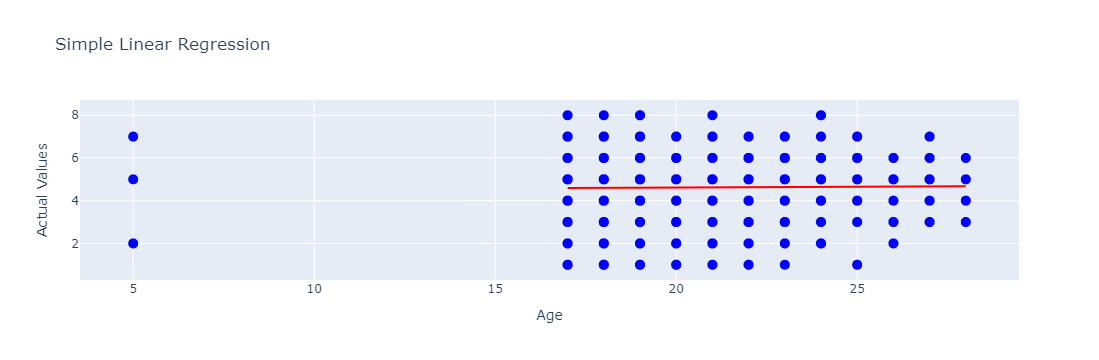

In [138]:
regression_df = pd.DataFrame({'Age': X_test['Age'], 'extraversion': y_pred})

scatter_fig = px.scatter(df, x='Age', y='extraversion', title='Simple Linear Regression', labels={'extraversion': 'Actual Values'})
scatter_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')

line_fig = px.line(regression_df, x='Age', y='extraversion', line_shape='linear', labels={'extraversion': 'Regression Line'})
line_fig.update_traces(line=dict(color='red'), name='Regression Line')

combined_fig = px.scatter(df, x='Age', y='extraversion', title='Simple Linear Regression', labels={'extraversion': 'Actual Values'})
combined_fig.update_traces(marker=dict(color='blue', size=10), name='Actual Values')
combined_fig.add_trace(line_fig.data[0]) 

combined_fig.show()

In [139]:
df.skew()

Gender              -0.093991
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [140]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()

Gender              -0.093991
Age                  0.471614
openness             0.234889
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness        0.107320
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [141]:
df_train = df[:train_length]
df_test = df[train_length:]
Y, X = df_train.values[:,-1], df_train.values[:,:-1]
Y_test, X_test = df_test.values[:,-1], df_test.values[:,:-1]
X = RobustScaler().fit_transform(X)
X_test = RobustScaler().fit_transform(X_test)

In [142]:
df_train['Personality'].value_counts() / len(df_train)

Personality
4    0.227080
1    0.211566
0    0.194640
2    0.188999
3    0.177715
Name: count, dtype: float64

In [143]:
df_test.reset_index(drop=True, inplace=True)

In [144]:
df_test['Personality'].value_counts() / len(df_test)

Personality
4    0.485714
1    0.244444
3    0.126984
2    0.076190
0    0.066667
Name: count, dtype: float64

In [145]:
param_grids = {}
models = []

logistic = LogisticRegression()
models.append(logistic)
param_grids[logistic] = {'C':np.arange(0.01, 1, 0.01)}

svc = SVC()
models.append(svc)
param_grids[svc] = {'kernel':['poly','rbf'],
                    'C':np.arange(0.01, 1, 0.01)}

knn = KNeighborsClassifier()
models.append(knn)
param_grids[knn] = {'n_neighbors':np.arange(2,11,1),
                    'weights':['uniform', 'distance'],
                    'p':np.arange(1,4,1)}

In [ ]:
def choose_hyperparameters(models, param_grids, X_train, Y_train):
    cv_models = {}
    scores = {}
    cv_with_scores = {}
    for model in models:
        label = str(type(model)).split('.')[-1].split("'")[0]
        gs = GridSearchCV(model, param_grid=param_grids[model])
        gs.fit(X_train, Y_train)
        cv_models[label] = gs
        scores[label] = gs.best_score_
        cv_with_scores[gs] = gs.best_score_
    return cv_models, scores, cv_with_scores

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
scores

In [ ]:
def relabel_personality(x):
    if x == 0 or x == 3:
        return 1
    else:
        return 0

relabel_personality_v = np.vectorize(relabel_personality)

Y = relabel_personality_v(Y)
Y_test = relabel_personality_v(Y_test)

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
scores